In [1]:
import numpy as np
import matplotlib.pyplot as plt

def funct(x,w): # function
    f = w[2]*x*x + w[1]*x + w[0] # Parabola
    return f

def grad_funct(x,w): # gradient
    grad_f = 2*w[2]*x + w[1]
    return grad_f

In [2]:
%matplotlib inline

Text(0,0.5,'f(x)')

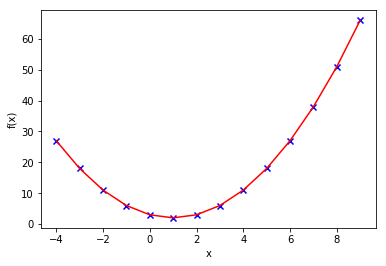

In [3]:
# COOK UP DATA
x = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) # Inputs
w = np.array([3, -2, 1]) # Actual weights
f = funct(x,w) # Model

# Plot data
plt.scatter(x, f, c="b", marker='x')
plt.plot(x, f, c="r")
plt.xlabel("x")
plt.ylabel("f(x)")

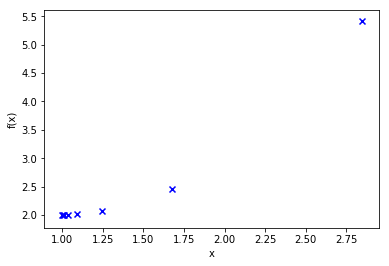

In [4]:
# Perform Gradient Descent on f(x)

# GRADIENT DESCENT

x = 6 # Some guess
learning_rate = 0.005
min_abs_change = 1e-5
max_iter = 1000

x_series = [x]

iterations = 1
while True:
    f = funct(x,w)
    grad_f = grad_funct(x,w)
    x_new = x - learning_rate * grad_f
    
    # Stopping Condition
    if np.sum(abs(x_new - x)) < min_abs_change:
        break
    if iterations > max_iter:
        break
    
    if iterations % (max_iter/10) == 0:
        # Plot data
        plt.scatter(x, f, c="b", marker='x')
        plt.plot(x, f, c="r")
        plt.xlabel("x")
        plt.ylabel("f(x)")
    
    iterations += 1
    x = x_new
    
    x_series = np.concatenate((x_series,[x]))

In [5]:
x_series

array([ 6.        ,  5.95      ,  5.9005    ,  5.851495  ,  5.80298005,
        5.75495025,  5.70740075,  5.66032674,  5.61372347,  5.56758624,
        5.52191038,  5.47669127,  5.43192436,  5.38760511,  5.34372906,
        5.30029177,  5.25728886,  5.21471597,  5.17256881,  5.13084312,
        5.08953469,  5.04863934,  5.00815295,  4.96807142,  4.9283907 ,
        4.8891068 ,  4.85021573,  4.81171357,  4.77359644,  4.73586047,
        4.69850187,  4.66151685,  4.62490168,  4.58865266,  4.55276614,
        4.51723847,  4.48206609,  4.44724543,  4.41277298,  4.37864525,
        4.34485879,  4.3114102 ,  4.2782961 ,  4.24551314,  4.21305801,
        4.18092743,  4.14911816,  4.11762697,  4.0864507 ,  4.0555862 ,
        4.02503034,  3.99478003,  3.96483223,  3.93518391,  3.90583207,
        3.87677375,  3.84800601,  3.81952595,  3.79133069,  3.76341739,
        3.73578321,  3.70842538,  3.68134113,  3.65452771,  3.62798244,
        3.60170261,  3.57568559,  3.54992873,  3.52442944,  3.49

In [6]:
iterations

849

In [7]:
%matplotlib inline

In [8]:
# Perform Gradient Descent with ADAM on f(x)

# GRADIENT DESCENT

x = 6 # Some guess
alpha = 0.1
beta1 = 0.9
beta2 = 0.9
min_abs_change = 1e-4
max_iter = 1000
m = 0*x
v = 0*x
epsilon = 10e-8

x_series = [x]

iterations = 1
while True:
    f = funct(x,w)
    grad_f = grad_funct(x,w)
    m = beta1 * m + (1-beta1) * grad_f
    v = beta2 * v + (1-beta2) * grad_f * grad_f
    m_hat = m / (1-np.power(beta1,iterations))
    v_hat = v / (1-np.power(beta2,iterations))
    x_new = x - alpha * m_hat / np.sqrt(v_hat + epsilon)
    
    # Stopping Condition
    if np.sum(abs(x_new - x)) < min_abs_change:
        break
    if iterations > max_iter:
        break
    
    if iterations % (max_iter/2) == 0:
        # Plot data
        plt.scatter(x, f, c="b", marker='x')
        plt.plot(x, f, c="r")
        plt.xlabel("x")
        plt.ylabel("f(x)")
    
    iterations += 1
    x = x_new
    
    x_series = np.concatenate((x_series,[x]))

In [10]:
x_series

array([ 6.        ,  5.9       ,  5.80000509,  5.70001893,  5.60004539,
        5.50008851,  5.40015257,  5.30024207,  5.20036171,  5.10051644,
        5.00071145,  4.90095218,  4.80124438,  4.70159405,  4.60200756,
        4.50249158,  4.4030532 ,  4.30369992,  4.2044397 ,  4.10528103,
        4.00623298,  3.90730525,  3.80850828,  3.70985333,  3.61135259,
        3.51301928,  3.41486781,  3.31691395,  3.219175  ,  3.12167   ,
        3.02441998,  2.92744828,  2.83078084,  2.73444664,  2.63847809,
        2.54291165,  2.44778836,  2.35315464,  2.25906311,  2.16557363,
        2.07275442,  1.9806835 ,  1.88945028,  1.79915746,  1.70992321,
        1.62188368,  1.53519591,  1.45004097,  1.36662755,  1.28519563,
        1.20602021,  1.1294147 ,  1.05573345,  0.98537283,  0.91876973,
        0.85639647,  0.79875107,  0.74634187,  0.6996663 ,  0.65918489,
        0.62529261,  0.59829123,  0.57836682,  0.56557603,  0.55984317,
        0.56096773,  0.5686402 ,  0.58246237,  0.60196857,  0.62

In [11]:
iterations

362